In [18]:
import numpy as np
from data_prep import get_fractured

In [5]:
# Data extracted from https://github.com/renato145/3D-ORGAN
original = np.load("custom_arq_dataset.npy", allow_pickle=True).item()

In [13]:
mask_train = np.array(original['train']['labels']) == 'table'
mask_test = np.array(original['test']['labels']) == 'table'

In [41]:
model_train = original['train']['data'][mask_train]
model_test = original['test']['data'][mask_test]

In [45]:
train_y = []
train_x = []
for model in model_train:
    frac = get_fractured(model)
    train_x.append(frac)
    train_y.append(model&~frac)
train_x = np.array(train_x)
train_y = np.array(train_y)

In [46]:
test_y = []
test_x = []
for model in model_test:
    frac = get_fractured(model)
    test_x.append(frac)
    test_y.append(model&~frac)
test_x = np.array(test_x)
test_y = np.array(test_y)

In [36]:
import matplotlib.pyplot as plt
import random

In [68]:
index = random.randint(0, len(train_x)-1)
model = train_x[index]
model_fractured = train_x[index]
model_recontruct = train_y[index]

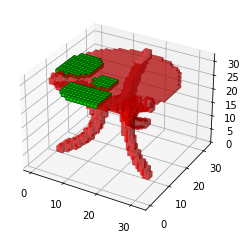

In [73]:
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(model_fractured, facecolors='red', alpha=0.5)
ax.voxels(model_recontruct, facecolors='lime', edgecolors='green')
plt.show()

# Save data

In [74]:
np.save("dataset.npy", {
    "train":{
        "x": train_x,
        "y": train_y
    },
    "test":{
        "x": test_x,
        "y": test_y
    }
})